**1.Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle




C:\Users\rog\AppData\Local\Temp\ipykernel_9228\1647153001.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'imblearn'

**2. Data Loading & Understading**


In [113]:
df=pd.read_csv("/content/train.csv")

**Initial Inspection**

In [114]:
df.shape

(800, 22)

In [115]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [116]:
df.tail(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [117]:
# to display all the columns of a dataframe
pd.set_option('display.max_columns',None)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [119]:
#rename the column name from contry_of_res to country_of_res and austim to autism
df.rename(columns={"contry_of_res":"country_of_res"},inplace=True)
df.rename(columns={"austim":"autism"},inplace=True)

In [120]:
#convert age column datatype to integer
df["age"]=df["age"].astype(int)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    int64  
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  autism           800 non-null    object 
 16  country_of_res   800 non-null    object 
 17  used_app_before 

In [122]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [123]:
for col in df.columns :
  numerical_features =["ID","age","result"]
  if col not in numerical_features:
    print(col,df[col].unique())
    print("-"*60)

A1_Score [1 0]
------------------------------------------------------------
A2_Score [0 1]
------------------------------------------------------------
A3_Score [1 0]
------------------------------------------------------------
A4_Score [0 1]
------------------------------------------------------------
A5_Score [1 0]
------------------------------------------------------------
A6_Score [0 1]
------------------------------------------------------------
A7_Score [1 0]
------------------------------------------------------------
A8_Score [0 1]
------------------------------------------------------------
A9_Score [1 0]
------------------------------------------------------------
A10_Score [1 0]
------------------------------------------------------------
gender ['f' 'm']
------------------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------

In [124]:
#dropping the ID and age_desc column
df = df.drop(columns=["ID","age_desc"])

In [125]:
df.shape

(800, 20)

In [126]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [127]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [128]:
df["country_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [129]:
from collections.abc import Mapping
#define the mapping dictionary for country names
mapping ={
    "Viet Nam":"vietnam",
    "AmericanSamoa":"United States",
    "Hong Kong":"China"
}

#replace value in the country column

df["country_of_res"]=df["country_of_res"].replace(mapping)

In [130]:
df["country_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [131]:
#target class distribution

df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**Insight get from step 2**

1.missing values in ethnicity & relation

2.age_desc column has only 1 unique value.so it removed as it is not important for  prediction

3.fixed country name

4.identified class imbalance in the target column


**3.Exploratory Data Analysis(EDA)**

In [132]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**

Numerical Columns:
- age
- result



In [133]:
#set the desired theme using seaborn
sns.set_theme(style="darkgrid")

Mean : 27.96375
Median : 24.0


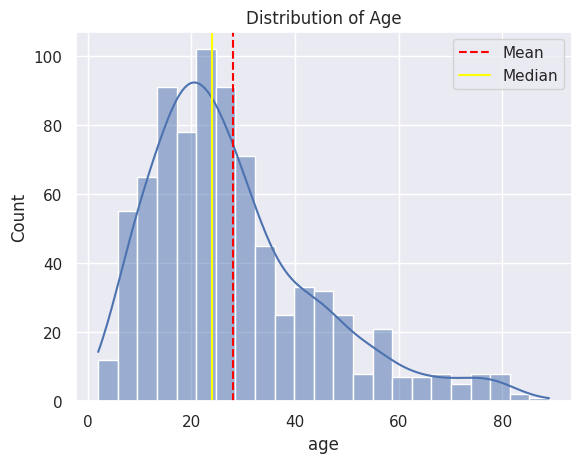

In [134]:
#Histogram for age
sns.histplot(df["age"],kde=True)
plt.title("Distribution of Age")

#calculate mean and median
age_mean=df["age"].mean()
age_median=df["age"].median()

print("Mean :",age_mean)
print("Median :",age_median)

#add vertical lines for mean and median
plt.axvline(age_mean,color="red",linestyle="--",label="Mean")
plt.axvline(age_median,color="yellow",linestyle="-",label="Median")
plt.legend()
plt.show()


Mean : 8.537303106501248
Median : 9.605299308


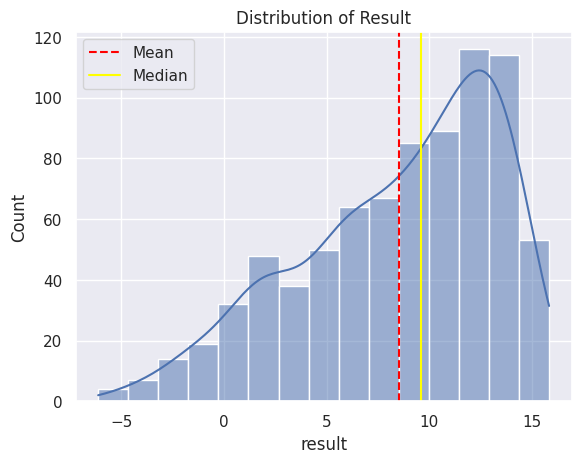

In [135]:
#Histogram for result
sns.histplot(df["result"],kde=True)
plt.title("Distribution of Result")

#calculate mean and median
result_mean=df["result"].mean()
result_median=df["result"].median()

print("Mean :",result_mean)
print("Median :",result_median)

#add vertical lines for mean and median
plt.axvline(result_mean,color="red",linestyle="--",label="Mean")
plt.axvline(result_median,color="yellow",linestyle="-",label="Median")
plt.legend()
plt.show()


**Box plots for identifying outliers in the numerical columns**

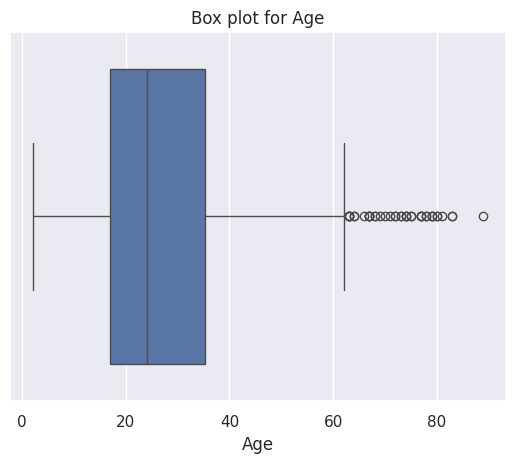

In [136]:
#Box plot
sns.boxplot(x=df["age"])
plt.title("Box plot for Age")
plt.xlabel("Age")

plt.show()

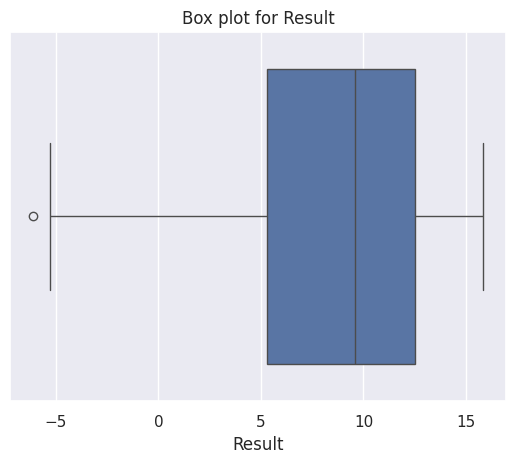

In [137]:
#Box plot
sns.boxplot(x=df["result"])
plt.title("Box plot for Result")
plt.xlabel("Result")
plt.show()

In [138]:
#count the outliers using the IQR method
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)

age_outlier=df[(df["age"]<lower_bound) | (df["age"]>upper_bound)]
len(age_outlier)

39

In [139]:
#count the outliers using the IQR method
Q1=df["result"].quantile(0.25)
Q3=df["result"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)

result_outlier=df[(df["result"]<lower_bound) | (df["result"]>upper_bound)]
len(result_outlier)

1

**Univariate Analysis of Categorical columns**

In [140]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

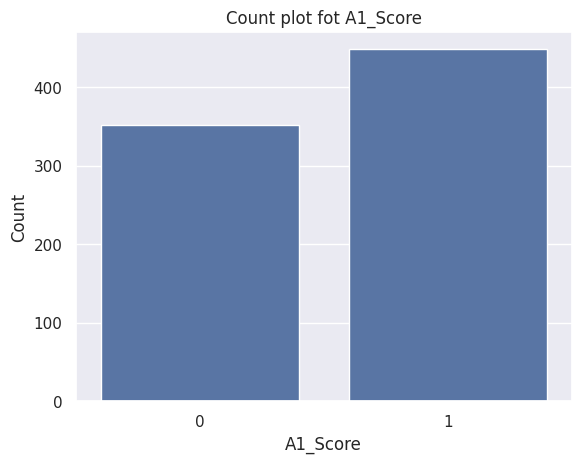

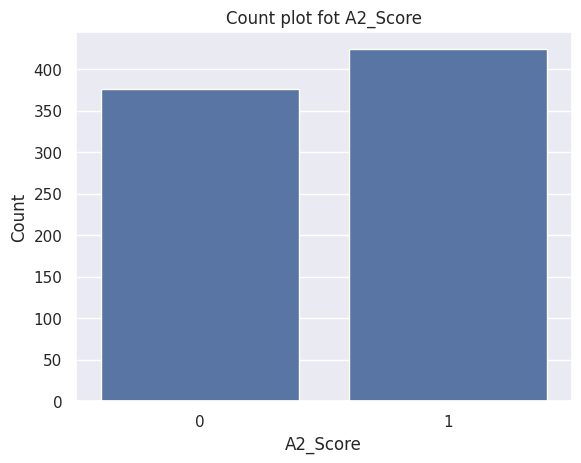

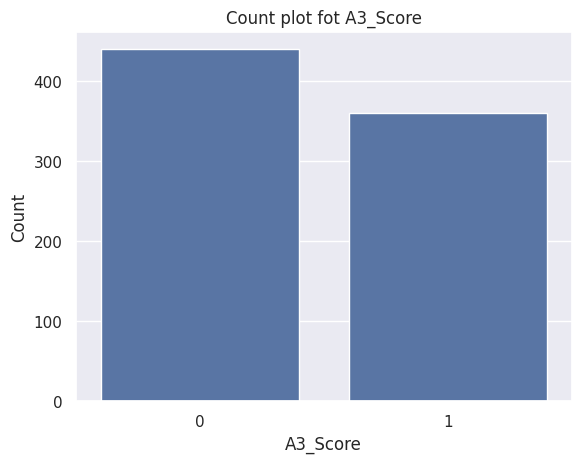

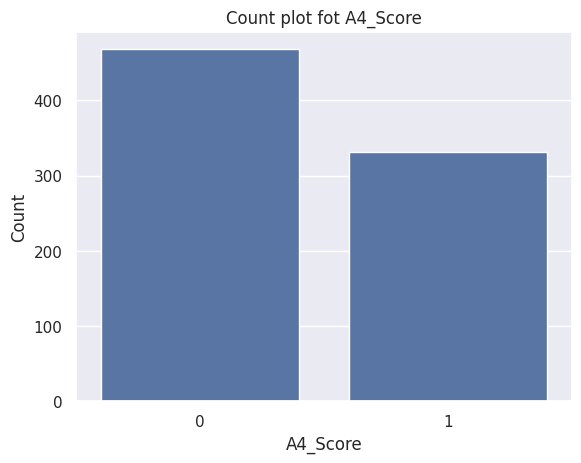

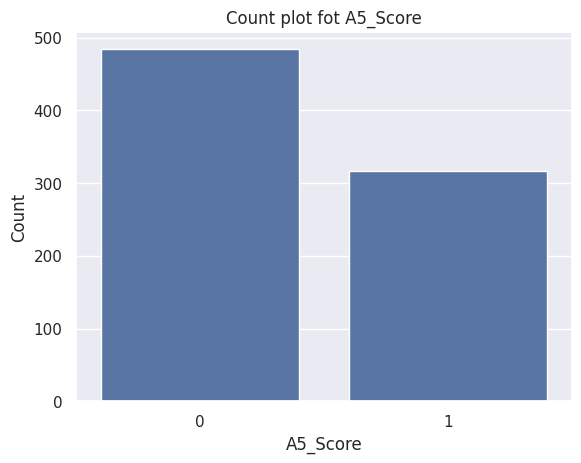

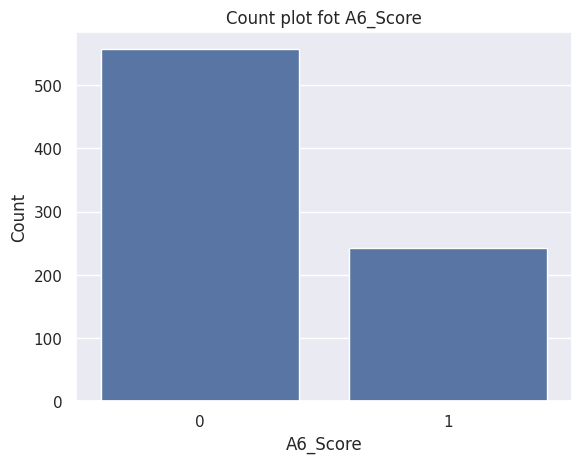

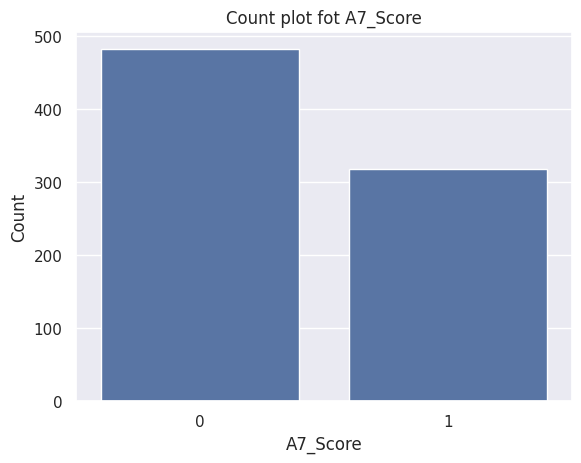

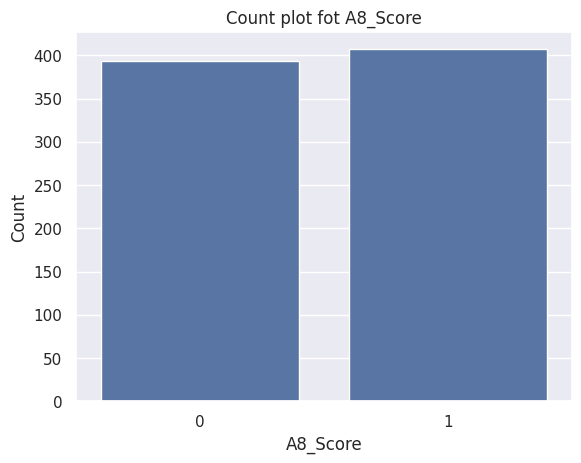

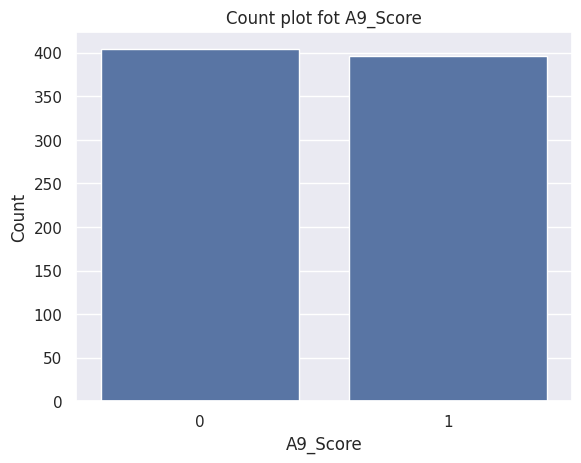

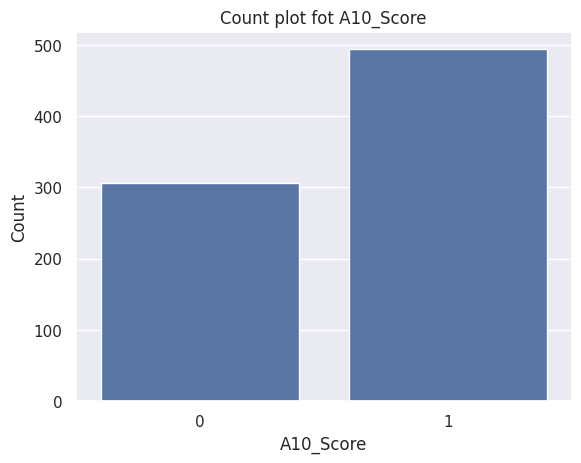

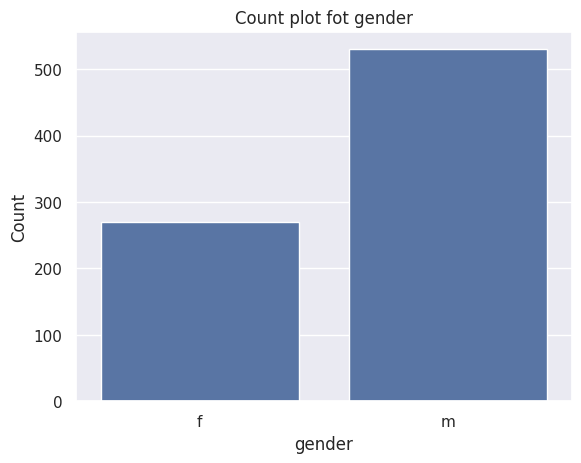

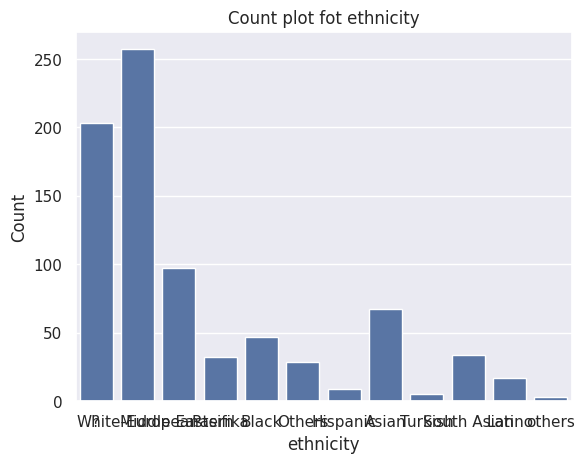

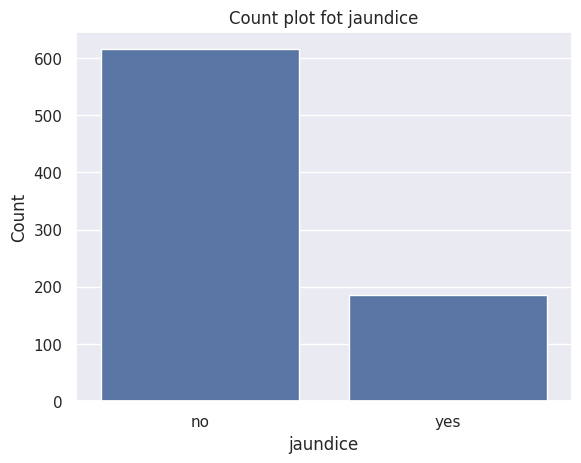

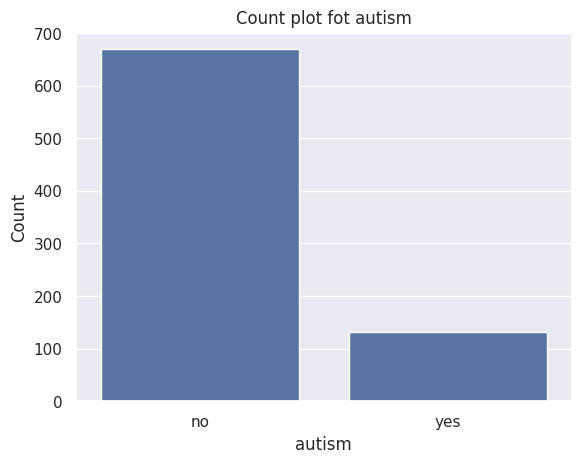

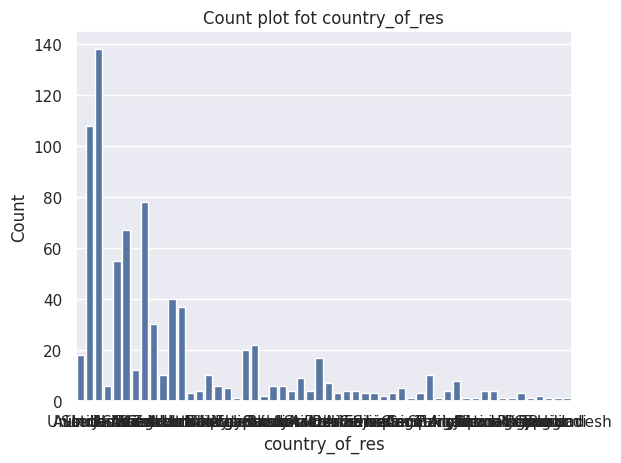

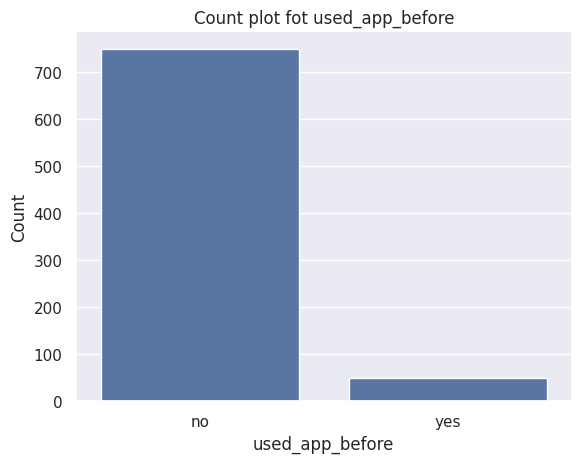

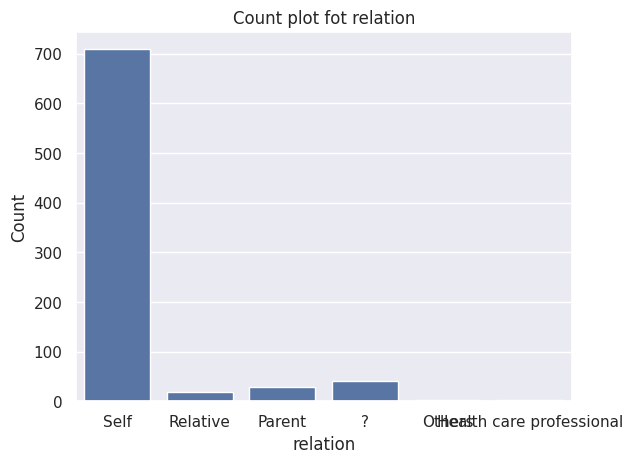

In [141]:
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
        'relation']

for col in categorical_columns:
  # plt.figure(figsize=(20,5))
  sns.countplot(x=df[col])
  plt.title(f"Count plot fot {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()


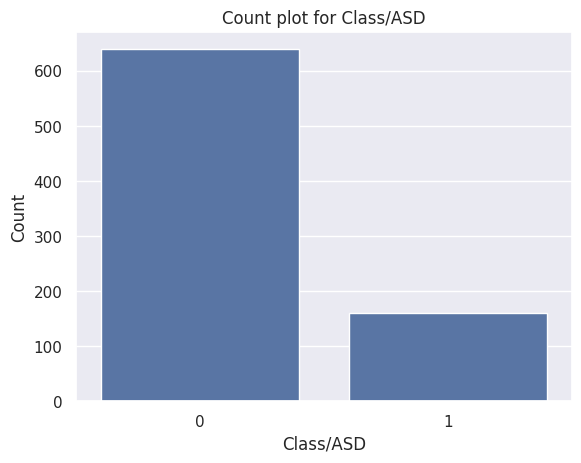

In [142]:
#count plot for target column(Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [143]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**handle missing values in ethnicity and relation column**

In [144]:
df["ethnicity"]=df["ethnicity"].replace({"?":"Others","others":"Others"})

In [145]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [146]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [147]:
df["relation"]=df["relation"].replace({"?":"Others",
                                       "Relative":"Others",
                                       "Parent":"Others",
                                       "Health care professional":"Others"})

In [148]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [149]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


**Label Encoding**

In [150]:
#identify columns with object data type
object_columns=df.select_dtypes(include="object").columns

In [151]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [152]:
#initialize a dictionary to store the encoders
encoders={}
#apply label encoding and store the encoders
for column in object_columns:
  label_encoder=LabelEncoder()
  df[column]=label_encoder.fit_transform(df[column])
  encoders[column]=label_encoder #saving the encoder for this column

#save the encoders as a pickle file
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)

In [153]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'autism': LabelEncoder(),
 'country_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [154]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


**Bivariate Analysis**

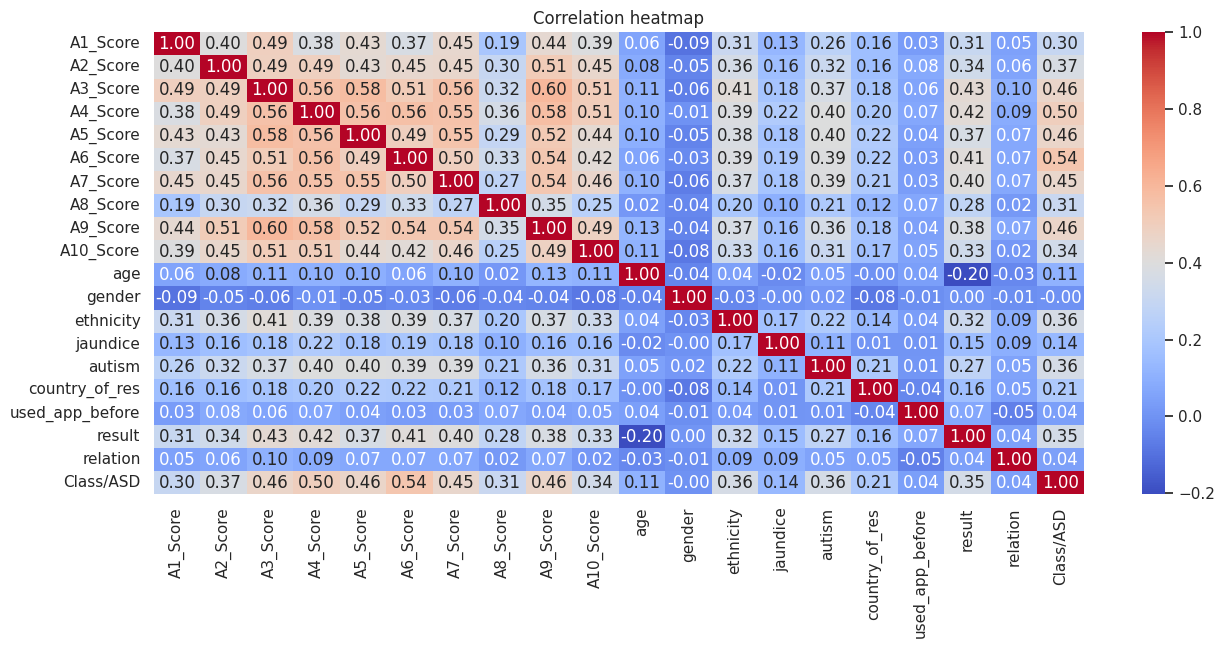

In [155]:
 #correlaltion matrix
 plt.figure(figsize=(15,6))
 sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
 plt.title("Correlation heatmap")
 plt.show()


**Insights we got from the EDA**
- there are few outliers in the numerical column(age,result)
- there is class imbalance in target column
- there is class imbalance in categorical feature
- we don't have any highly correlated column
- perform label encoding and saved the encodes

**4. Data Preprocessing**

Handling the outliers

In [156]:
#function to replace the outliers with median
def replace_outliers_with_median(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-(1.5*Q1)
  upper_bound=Q3+(1.5*Q3)

  median=df[column].median()

  #replace outliers with median value
  df[column]=df[column].apply(lambda x:median if x<lower_bound or x>upper_bound else x)

  return df


In [157]:
#replace outliers in the "age " column
df=replace_outliers_with_median(df,"age")

#replace outliers in the "result " column
df=replace_outliers_with_median(df,"result")

In [158]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,9.605299,1,0


In [159]:
df.shape

(800, 20)

**Train Test Split**

In [160]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [161]:
X=df.drop(columns=["Class/ASD"])
y=df["Class/ASD"]

In [162]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  auti

In [163]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [164]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [165]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [166]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [167]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


SMOTE(Synthetic minority oversampling technique)

In [168]:
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)


In [169]:
print(y_train_smote.shape)

(1030,)


In [170]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


**5.Model Training**

In [171]:
#dictionary of classifiers
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}

In [172]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)}


In [173]:
#dictionary to store the cross-validation for each model
cv_scores={}

#perform 5-fold cross-validation for each model
for model_name,model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores=cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} Cross-Validation Accuracy:{np.mean(scores):.2f}")
  print("-"*60)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy:0.85
------------------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy:0.90
------------------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy:0.90
------------------------------------------------------------


In [174]:
cv_scores

{'Decision Tree': array([0.77184466, 0.84951456, 0.88834951, 0.88349515, 0.86407767]),
 'Random Forest': array([0.86407767, 0.9223301 , 0.89805825, 0.91747573, 0.91747573]),
 'XGBoost': array([0.85436893, 0.91747573, 0.89320388, 0.91262136, 0.91262136])}

**6.Model Selection and Hyperparameter Tuning**

In [175]:
#Initializing models
decision_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)
xgboost_classifier=XGBClassifier(random_state=42)

In [176]:
# Hyperparameters grid for RandomizedSearchCV

param_grid_dt={
  "criterion":["gini","entropy"],
  "max_depth":[None,5,10,15,20,25,50],
  "min_samples_split":[2,5,10],
  "min_samples_leaf":[1,2,4]

}

param_grid_rf={
    "n_estimators":[50,100,150,200],
    "max_depth":[None,5,10,20],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]
}

param_grid_xgb={
    "n_estimators":[50,100,200,700],
    "max_depth":[None,5,10,30,50],
    "learning_rate":[.01,0.1,0.2,0.3],
    "subsample":[0.5,0.7,1.0],
    "colsample_bytree":[0.5,0.7,1.0]


}

In [177]:
#hyperparameter tuning for 3 tree based models
#the below steps can be automated by using a for loop or by using a pipeline
#perform RandomizedSearchCV for each model

random_search_dt=RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_search_rf=RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_rf,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_search_xgb=RandomizedSearchCV(estimator=xgboost_classifier,param_distributions=param_grid_xgb,n_iter=20,cv=5,scoring="accuracy",random_state=42)




In [178]:
#fit the models
random_search_dt.fit(X_train_smote,y_train_smote)
random_search_rf.fit(X_train_smote,y_train_smote)
random_search_xgb.fit(X_train_smote,y_train_smote)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [None, 5, 10, 30, 50],
                                        'n_estimators': [50, 100, 200, 700],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [179]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)


DecisionTreeClassifier(max_depth=10, random_state=42)
0.8631067961165048
RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=50, random_state=42)
0.9077669902912622


In [180]:
#get the model with the best score

best_model=None
best_score=0

if random_search_dt.best_score_>best_score:
  best_model=random_search_dt.best_estimator_
  best_score=random_search_dt.best_score_

if random_search_rf.best_score_>best_score:
  best_model=random_search_rf.best_estimator_
  best_score=random_search_rf.best_score_

if random_search_xgb.best_score_>best_score:
  best_model=random_search_xgb.best_estimator_
  best_score=random_search_xgb.best_score_



In [181]:
print(f"Best Model: {best_model}")
print(f"Best Cross-validation Accuracy:{best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=50, random_state=42)
Best Cross-validation Accuracy:0.91


In [182]:
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

In [183]:
#evaluate on the global test data before we perform smote
y_test_pred=best_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_test_pred))
print("Classificationn Report:",classification_report(y_test,y_test_pred))



Accuracy Score: 0.8125
Confusion Matrix: [[109  15]
 [ 15  21]]
Classificationn Report:               precision    recall  f1-score   support

           0       0.88      0.88      0.88       124
           1       0.58      0.58      0.58        36

    accuracy                           0.81       160
   macro avg       0.73      0.73      0.73       160
weighted avg       0.81      0.81      0.81       160

